	Implement the Continuous Bag of Words (CBOW) Model for the given (textual document 1) using the below steps:

a.	Data preparation

b.	Generate training data

c.	Train model

d.	Output


In [76]:
file_path = './CBOW.txt'
with open(file_path, 'r') as file:
    file_contents = file.read()

In [77]:
file_contents

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. \\n\\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. \\n\\nThe reproductive number – the number of secondary infections generated from one infected individual – is understood to be b

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [79]:
# Sample sentences

sentences= file_contents.split('.')
sentences

['The speed of transmission is an important point of difference between the two viruses',
 ' Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus',
 ' The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days',
 ' This means that influenza can spread faster than COVID-19',
 ' \\n\\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza',
 ' In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission',
 ' \\n\\nThe reproductive number – the number of secondary infections generated from one infected individua

In [80]:
# Tokenizer the sentenes

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

In [81]:
window_size = 3

In [82]:
tokenized_sentences = tokenizer.texts_to_sequences(sentences)

In [83]:
data, labels = [], []
for sentence in tokenized_sentences:
    for i, target_word in enumerate(sentence):
        context = [
            sentence[j] for j in range (i- window_size, i+window_size+1)
            if j!=i and 0 <= j < len(sentence)
        ]
        data.append(context)
        labels.append(target_word)

In [84]:
labels

[1,
 39,
 2,
 8,
 9,
 40,
 41,
 42,
 2,
 43,
 13,
 1,
 44,
 23,
 3,
 45,
 11,
 24,
 46,
 47,
 48,
 1,
 14,
 25,
 49,
 10,
 26,
 2,
 27,
 12,
 11,
 24,
 15,
 16,
 1,
 14,
 13,
 50,
 51,
 17,
 4,
 5,
 6,
 1,
 15,
 16,
 7,
 4,
 5,
 6,
 9,
 52,
 10,
 18,
 19,
 53,
 20,
 28,
 7,
 3,
 6,
 1,
 15,
 16,
 9,
 29,
 20,
 30,
 54,
 31,
 3,
 32,
 55,
 56,
 17,
 4,
 5,
 33,
 57,
 8,
 34,
 1,
 58,
 29,
 19,
 20,
 2,
 59,
 60,
 61,
 62,
 63,
 8,
 64,
 2,
 1,
 6,
 65,
 1,
 26,
 2,
 27,
 21,
 9,
 11,
 35,
 36,
 2,
 8,
 7,
 3,
 34,
 66,
 28,
 67,
 22,
 68,
 31,
 69,
 22,
 70,
 71,
 32,
 72,
 4,
 5,
 6,
 73,
 74,
 75,
 76,
 10,
 77,
 78,
 79,
 80,
 30,
 81,
 82,
 83,
 10,
 18,
 11,
 35,
 36,
 2,
 8,
 33,
 84,
 85,
 37,
 21,
 1,
 37,
 2,
 86,
 87,
 88,
 25,
 89,
 90,
 91,
 21,
 9,
 92,
 10,
 18,
 13,
 38,
 12,
 38,
 19,
 7,
 4,
 5,
 6,
 93,
 17,
 7,
 3,
 94,
 95,
 7,
 96,
 4,
 5,
 12,
 3,
 23,
 22,
 97,
 98,
 12,
 14,
 99,
 100,
 101,
 102,
 103,
 104]

In [85]:
# Convert data and labels to numpy arrays

data = pad_sequences(data)
data

array([[  0,   0,   0,  39,   2,   8],
       [  0,   0,   1,   2,   8,   9],
       [  0,   1,  39,   8,   9,  40],
       ...,
       [  0,  99, 100, 101, 103, 104],
       [  0,   0, 100, 101, 102, 104],
       [  0,   0,   0, 101, 102, 103]], dtype=int32)

In [86]:
labels = np.array(labels)
labels

array([  1,  39,   2,   8,   9,  40,  41,  42,   2,  43,  13,   1,  44,
        23,   3,  45,  11,  24,  46,  47,  48,   1,  14,  25,  49,  10,
        26,   2,  27,  12,  11,  24,  15,  16,   1,  14,  13,  50,  51,
        17,   4,   5,   6,   1,  15,  16,   7,   4,   5,   6,   9,  52,
        10,  18,  19,  53,  20,  28,   7,   3,   6,   1,  15,  16,   9,
        29,  20,  30,  54,  31,   3,  32,  55,  56,  17,   4,   5,  33,
        57,   8,  34,   1,  58,  29,  19,  20,   2,  59,  60,  61,  62,
        63,   8,  64,   2,   1,   6,  65,   1,  26,   2,  27,  21,   9,
        11,  35,  36,   2,   8,   7,   3,  34,  66,  28,  67,  22,  68,
        31,  69,  22,  70,  71,  32,  72,   4,   5,   6,  73,  74,  75,
        76,  10,  77,  78,  79,  80,  30,  81,  82,  83,  10,  18,  11,
        35,  36,   2,   8,  33,  84,  85,  37,  21,   1,  37,   2,  86,
        87,  88,  25,  89,  90,  91,  21,   9,  92,  10,  18,  13,  38,
        12,  38,  19,   7,   4,   5,   6,  93,  17,   7,   3,  9

In [87]:
# Define CBOW model
embedding_dim = 50

model = models.Sequential([
    layers.Embedding(input_dim = total_words, output_dim = embedding_dim, input_length = window_size*2),
    layers.GlobalAveragePooling1D(),
    layers.Dense(total_words, activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [88]:
# Compile the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
# Train the model
model.fit(data, labels, epochs=350, verbose=1)

Epoch 1/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0054 - loss: 4.6539    
Epoch 2/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.0519 - loss: 4.6440
Epoch 3/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.1281 - loss: 4.6354
Epoch 4/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.1596 - loss: 4.6256
Epoch 5/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.1591 - loss: 4.6183
Epoch 6/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.1734 - loss: 4.6091
Epoch 7/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.1762 - loss: 4.6006
Epoch 8/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.1508 - loss: 4.5887
Epoch 9/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1778 - loss: 4.5766  
Epoch 10/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.1736 - loss: 4.5659
Epoch 11/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.1942 - loss: 4.5532
Epoch 12/350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accurac

In [90]:
word_embeddings = model.get_layer(index=0).get_weights()[0]

In [91]:
word_embeddings = model.layers[0].get_weights()[0]


In [92]:
# Fit TSNE model on word embeddings
tsne = TSNE(n_components=2, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_embeddings)

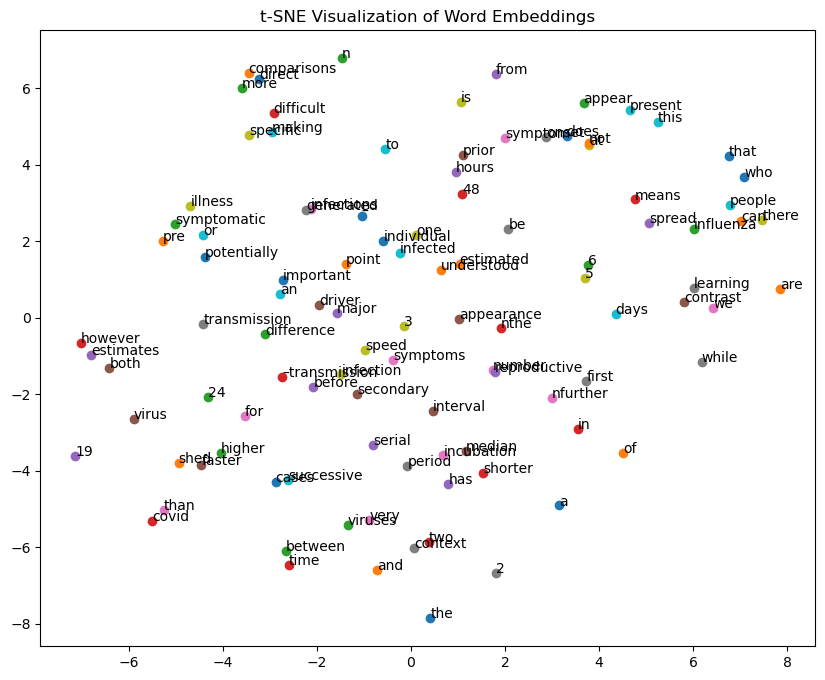

In [93]:
# Visualization
plt.figure(figsize = (10, 8))
for word, idx in tokenizer.word_index.items():
    plt.scatter(word_embeddings_2d[idx, 0], word_embeddings_2d[idx, 1])
    plt.annotate(word, (word_embeddings_2d[idx, 0], word_embeddings_2d[idx, 1]))
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

target_word = 'influenza'
target_embedding = word_embeddings[tokenizer.word_index[target_word]]

similarities = cosine_similarity(target_embedding.reshape(1, -1), word_embeddings)[0]
most_similar_indices = similarities.argsort()[-5:][::-1]

most_similar_words = [word for word, idx in tokenizer.word_index.items() if idx in most_similar_indices]
print(f"Most similar words to '{target_word}': {most_similar_words}")


Most similar words to 'influenza': ['influenza', 'are', 'means', 'spread', 'people']


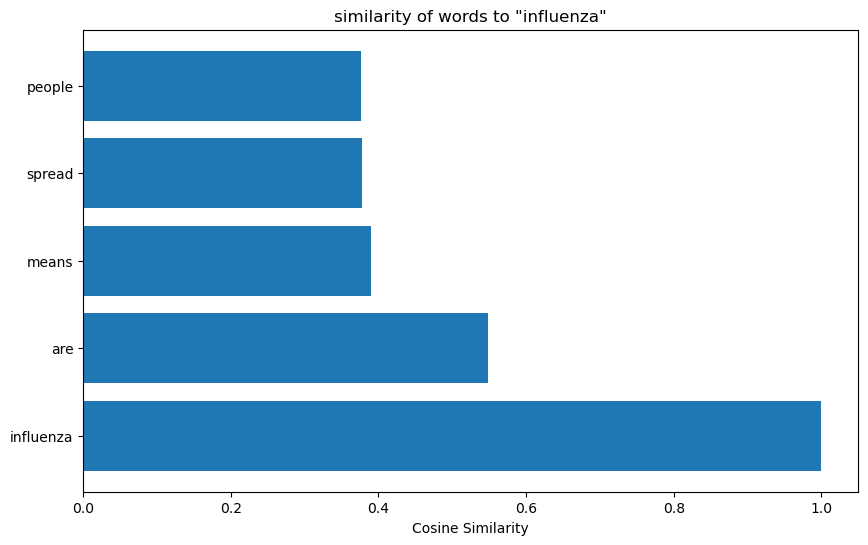

In [95]:
# Plot cosine similarities
plt.figure(figsize=(10, 6))
plt.barh(most_similar_words, similarities[most_similar_indices])
plt.xlabel('Cosine Similarity')
plt.title(f'similarity of words to "{target_word}"')
plt.show()